<a href="https://colab.research.google.com/github/notyourav/gcc_classification/blob/master/gcc_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install capstone
!pip install keras

import itertools, re
import pandas as pd
import numpy as np
from capstone import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Functions
fns = '''
#include <stdio.h>

// function 1: print even numbers from 1 to n using for loop
void print_even_numbers_for(int n) {
    for (int i = 2; i <= n; i += 2) {
        printf("%d ", i);
    }
    printf("\\n");
}

// function 2: print odd numbers from 1 to n using while loop
void print_odd_numbers_while(int n) {
    int i = 1;
    while (i <= n) {
        printf("%d ", i);
        i += 2;
    }
    printf("\\n");
}

// function 3: print numbers from n to 1 using do-while loop
void print_numbers_reverse_do_while(int n) {
    int i = n;
    do {
        printf("%d ", i);
        i--;
    } while (i >= 1);
    printf("\\n");
}

// function 4: calculate factorial of a number using for loop
int factorial_for(int n) {
    int result = 1;
    for (int i = 1; i <= n; i++) {
        result *= i;
    }
    return result;
}

// function 5: calculate sum of squares of first n natural numbers using while loop
int sum_of_squares_while(int n) {
    int sum = 0, i = 1;
    while (i <= n) {
        sum += i * i;
        i++;
    }
    return sum;
}

// function 6: calculate sum of first n even numbers using do-while loop
int sum_of_even_numbers_do_while(int n) {
    int sum = 0, i = 2;
    do {
        sum += i;
        i += 2;
    } while (i <= n * 2);
    return sum;
}

// function 7: print Fibonacci series up to n using for loop
void fibonacci_for(int n) {
    int a = 0, b = 1, c;
    printf("%d %d ", a, b);
    for (int i = 3; i <= n; i++) {
        c = a + b;
        printf("%d ", c);
        a = b;
        b = c;
    }
    printf("\\n");
}

// function 8: print multiplication table of a number up to n using while loop
void multiplication_table_while(int num, int n) {
    int i = 1;
    while (i <= n) {
        printf("%d x %d = %d\\n", num, i, num * i);
        i++;
    }
}

// function 9: print prime numbers up to n using do-while loop
void prime_numbers_do_while(int n) {
    int i = 2;
    do {
        int is_prime = 1;
        for (int j = 2; j < i; j++) {
            if (i % j == 0) {
                is_prime = 0;
                break;
            }
        }
        if (is_prime) {
            printf("%d ", i);
        }
        i++;
    } while (i <= n);
    printf("\\n");
}

// function 10: calculate sum of first n odd numbers using for loop
int sum_of_odd_numbers_for(int n) {
    int sum = 0;
    for (int i = 1; i <= n * 2; i += 2) {
        sum += i;
    }
    return sum;
}

// function 11: print numbers in an array using for loop
void print_array_for(int arr[], int size) {
for (int i = 0; i < size; i++) {
printf("%d ", arr[i]);
}
printf("\\n");
}

// function 12: calculate sum of elements in an array using while loop
int sum_of_array_while(int arr[], int size) {
int sum = 0, i = 0;
while (i < size) {
sum += arr[i];
i++;
}
return sum;
}

// function 13: find maximum element in an array using do-while loop
int max_array_element_do_while(int arr[], int size) {
int max = arr[0], i = 1;
do {
if (arr[i] > max) {
max = arr[i];
}
i++;
} while (i < size);
return max;
}

// function 14: find minimum element in an array using for loop
int min_array_element_for(int arr[], int size) {
int min = arr[0];
for (int i = 1; i < size; i++) {
if (arr[i] < min) {
min = arr[i];
}
}
return min;
}

// function 15: print characters in a string using while loop
void print_string_while(char str[]) {
int i = 0;
while (str[i] != '\\0') {
printf("%c", str[i]);
i++;
}
printf("\\n");
}

// function 16: count number of vowels in a string using do-while loop
int count_vowels_do_while(char str[]) {
int count = 0, i = 0;
do {
if (str[i] == 'a' || str[i] == 'e' || str[i] == 'i' || str[i] == 'o' || str[i] == 'u') {
count++;
}
i++;
} while (str[i] != '\\0');
return count;
}

// function 17: reverse a string using for loop
void reverse_string_for(char str[]) {
int len = 0;
while (str[len] != '\\0') {
len++;
}
for (int i = len - 1; i >= 0; i--) {
printf("%c", str[i]);
}
printf("\\n");
}

// function 18: calculate power of a number using while loop
int power_while(int base, int exponent) {
int result = 1, i = 0;
while (i < exponent) {
result *= base;
i++;
}
return result;
}

// function 19: calculate sum of digits of a number using do-while loop
int sum_of_digits_do_while(int num) {
int sum = 0;
do {
sum += num % 10;
num /= 10;
} while (num > 0);
return sum;
}

// function 20: print Pascal's triangle up to n rows using for loop
void pascals_triangle_for(int n) {
    int coef = 1;
    for (int i = 0; i < n; i++) {
        for (int j = 1; j <= n - i; j++) {
            printf(" ");
        }
        for (int j = 0; j <= i; j++) {
            if (j == 0 || i == 0) {
                coef = 1;
            } else {
              coef = coef * (i - j + 1) / j;
            }
            printf("%4d", coef);
        }
        printf("\\n");
    }
}

int main() {
    // testing the functions
    print_even_numbers_for(10);
    print_odd_numbers_while(10);
    print_numbers_reverse_do_while(10);
    printf("factorial of 5 is %d\\n", factorial_for(5));
    printf("sum of squares of first 5 natural numbers is %d\\n", sum_of_squares_while(5));
    printf("sum of first 5 even numbers is %d\\n", sum_of_even_numbers_do_while(5));
    fibonacci_for(10);
    multiplication_table_while(5, 10);
    prime_numbers_do_while(20);
    printf("sum of first 5 odd numbers is %d\\n", sum_of_odd_numbers_for(5));
    int arr[] = {1, 2, 3, 4, 5};
    printf("array elements are: ");
    print_array_for(arr, 5);
    printf("sum of array elements is %d\\n", sum_of_array_while(arr, 5));
    printf("maximum element in array is %d\\n", max_array_element_do_while(arr, 5));
    printf("minimum element in array is %d\\n", min_array_element_for(arr, 5));
    char str[] = "hello";
    printf("characters in string are: ");
    print_string_while(str);
    printf("number of vowels in string is %d\\n", count_vowels_do_while(str));
    printf("reverse of string is: ");
    reverse_string_for(str);
    printf("2 raised to power 4 is %d\\n", power_while(2, 4));
    printf("sum of digits of 1234 is %d\\n", sum_of_digits_do_while(1234));
    pascals_triangle_for(5);

    return 0;
}
'''

In [ ]:
with open("program.c", "w") as file:
  file.write(fns)

lines = fns.split('\n')

In [ ]:
%%capture null
from subprocess import Popen, PIPE

process = Popen(f"gcc -ggdb -Xlinker -Map=program.map program.c -o program.o && cat program.o", shell=True, stdout=PIPE, stderr=PIPE)
asm, stderr = process.communicate()
print(stderr.decode('utf-8'))

In [ ]:
%%capture dis_begin
!nm program.o | awk '/print_even_numbers_for/{print $1}'

In [ ]:
# !objdump program.o -D --start-address={offset} --stop-address={offset + 10}

In [ ]:
fn_addrs = {}
with open('program.map', 'r') as mapfile:
  l = mapfile.read()
  l = l[:l.find('main')]
  l = l[l.rfind('.text'):]
  l = l[l.find('0x', l.find('\n')):]
  tuples = re.findall('(\w+)\s+(\w+)\n\s+(?=(\w+))', l)
  fn_addrs = dict([(name, (begin, end)) for begin, name, end in tuples])

In [ ]:
md = Cs(CS_ARCH_X86, CS_MODE_64)
md.detail = True
offset = int(dis_begin.stdout, 16)

maxlen = 0

fn_asm = {}
for fn in fn_addrs:
  begin, end = fn_addrs[fn]
  begin, end = int(begin, 16), int(end, 16)

  fn_asm[fn] = []
  for i in md.disasm(asm[begin:], begin):
    if i.address >= end:
      break
    fn_asm[fn].append(i)

  maxlen = max(maxlen, len(fn_asm[fn]))

In [ ]:
dataset = {}
dataset['target'] = []
dataset['data'] = []

for fn in fn_asm:
  loop_type = 'for'
  if fn.find('_for') != -1:
    loop_type = 'for'
  elif fn.find('_do_while') != -1:
    loop_type = 'do'
  elif fn.find('_while') != -1:
    loop_type = 'while'

  s = []
  for i in fn_asm[fn]:
    s.append(i.opcode)

  dataset['data'].append(s)
  dataset['target'].append(loop_type)

dataset['data'] = pad_sequences(dataset['data'], maxlen=maxlen)

In [ ]:
# flatten function opcode arrays
n_samples = len(dataset['data'])
data = dataset['data'].reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, dataset['target'], test_size=0.5, shuffle=True
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

          do       0.10      1.00      0.18         1
         for       0.00      0.00      0.00         7
       while       0.00      0.00      0.00         2

    accuracy                           0.10        10
   macro avg       0.03      0.33      0.06        10
weighted avg       0.01      0.10      0.02        10




/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[1 0 0]
 [7 0 0]
 [2 0 0]]


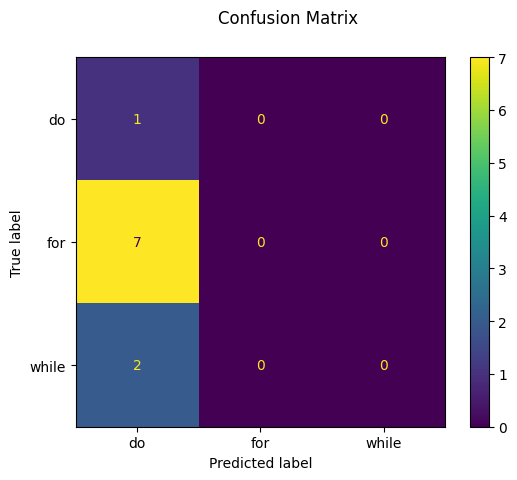

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
def addr2line(progname, addresses):
  hexed = [hex(address) for address in addresses]
  process = Popen(["addr2line", f'--exe={progname}'] + hexed, stdout=PIPE, stderr=PIPE)
  stdout, stderr = map(lambda x: bytes.decode(x, 'utf-8'), process.communicate())

  if stderr:
    raise RuntimeError(f"addr2line: {stderr}")

  lines = stdout.split('\n')[:-1]

  result = []
  for line in lines:

    discriminator = 0
    m = re.search(r'\(discriminator (\w+)\)', line)
    if m != None:
      discriminator = int(m.group(1))
      line = line[:m.start()]
    line = line.split(':')
    path = line[0]
    lineno = int(line[1]) - 1
    result.append({'path' : path, 'line' : lineno, 'phi' : discriminator})

  return result

In [ ]:
from clang.cindex import TranslationUnit
from clang.cindex import CursorKind

tu = TranslationUnit.from_source('program.c')
tokens = tu.get_tokens(extent=tu.cursor.extent)
line_tokens = {}
for tok in tokens:
  line_tokens.setdefault(tok.cursor.location.line - 1, []).append(tok)

In [ ]:
# addrs_flattened = [i.address for asm in fn_asm for i in fn_asm[asm]]

# dfs = []

# for fn in fn_asm:
#   asm = fn_asm[fn]
#   linenos = addr2line('program.o', [i.address for i in asm])

#   rows = []
#   for l, ins in zip(linenos, asm):
#     lineno, path, phi = l['line'], l['path'], l['phi']

#     row = {}

#     row['mnemonic'] = ins.mnemonic
#     row['opcode'] = ins.opcode
#     row['lineno'] = lineno
#     row['line'] = lines[lineno]
#     row['path'] = path
#     row['phi'] = phi

#     toks = line_tokens.get(lineno, [])
#     function_decl = while_stmt = for_stmt = do_stmt = if_stmt = call_expr = decl_stmt = return_stmt = 0
#     for tok in toks:
#       k = tok.cursor.kind
#       if k == CursorKind.FUNCTION_DECL:
#         function_decl = 1
#       if k == CursorKind.WHILE_STMT:
#         while_stmt = 1
#       if k == CursorKind.FOR_STMT:
#         print(tok.cursor.walk_preorder())
#         for_stmt = 1
#       if k == CursorKind.DO_STMT:
#         do_stmt = 1
#       if k == CursorKind.IF_STMT:
#         if_stmt = 1
#       if k == CursorKind.CALL_EXPR:
#         call_expr = 1
#       if k == CursorKind.DECL_STMT:
#         decl_stmt = 1
#       if k == CursorKind.RETURN_STMT:
#         return_stmt = 1
#     row['function_decl'] = function_decl
#     row['while_stmt'] = while_stmt
#     row['for_stmt'] = for_stmt
#     row['do_stmt'] = do_stmt
#     row['if_stmt'] = if_stmt
#     row['call_expr'] = call_expr
#     row['decl_stmt'] = decl_stmt
#     row['return_stmt'] = return_stmt
#     rows.append(row)
#   dfs.append(pd.DataFrame(rows))

# dfs[4]

In [ ]:
def collect_tokens(root):
  rows = {}
  for cursor in root.cursor.walk_preorder():
    function_decl = while_stmt = for_stmt = do_stmt = if_stmt = call_expr = decl_stmt = return_stmt = 0
    for tok in cursor.get_tokens():
      k = tok.cursor.kind
      if not tok.cursor.location.line in rows:
        rows[tok.cursor.location.line] = {}
      row = rows[tok.cursor.location.line]
      if k == CursorKind.FUNCTION_DECL:
        row['function_decl'] = 1
      if k == CursorKind.WHILE_STMT:
        row['while_stmt'] = 1
      if k == CursorKind.FOR_STMT:
        row['for_stmt'] = 1
      if k == CursorKind.DO_STMT:
        row['do_stmt'] = 1
      if k == CursorKind.IF_STMT:
        row['if_stmt'] = 1
      if k == CursorKind.CALL_EXPR:
        row['call_expr'] = 1
      if k == CursorKind.DECL_STMT:
        row['decl_stmt'] = 1
      if k == CursorKind.RETURN_STMT:
        row['return_stmt'] = 1
  return rows

In [ ]:
!clang -Xclang -ast-dump -fsyntax-only program.c

TranslationUnitDecl 0x2042f88 <<invalid sloc>> <invalid sloc>
|-TypedefDecl 0x2043820 <<invalid sloc>> <invalid sloc> implicit __int128_t '__int128'
| `-BuiltinType 0x2043520 '__int128'
|-TypedefDecl 0x2043890 <<invalid sloc>> <invalid sloc> implicit __uint128_t 'unsigned __int128'
| `-BuiltinType 0x2043540 'unsigned __int128'
|-TypedefDecl 0x2043b98 <<invalid sloc>> <invalid sloc> implicit __NSConstantString 'struct __NSConstantString_tag'
| `-RecordType 0x2043970 'struct __NSConstantString_tag'
|   `-Record 0x20438e8 '__NSConstantString_tag'
|-TypedefDecl 0x2043c30 <<invalid sloc>> <invalid sloc> implicit __builtin_ms_va_list 'char *'
| `-PointerType 0x2043bf0 'char *'
|   `-BuiltinType 0x2043020 'char'
|-TypedefDecl 0x2043f28 <<invalid sloc>> <invalid sloc> implicit referenced __builtin_va_list 'struct __va_list_tag [1]'
| `-ConstantArrayType 0x2043ed0 'struct __va_list_tag [1]' 1 
|   `-RecordType 0x2043d10 'struct __va_list_tag'
|     `-Record 0x2043c88 '__va_list_tag'
|-TypedefDe

In [ ]:
addrs_flattened = [i.address for asm in fn_asm for i in fn_asm[asm]]

loops = []

tu = TranslationUnit.from_source('program.c')
tokens = tu.get_tokens(extent=tu.cursor.extent)
for tok in tokens:
  kind = tok.cursor.kind
  if kind == CursorKind.FOR_STMT:
    loops.append(collect_tokens(tok))
  if kind == CursorKind.WHILE_STMT:
    loops.append(collect_tokens(tok))
  if kind == CursorKind.DO_STMT:
    loops.append(collect_tokens(tok))

loops

# for fn in fn_asm:
#   asm = fn_asm[fn]
#   linenos = addr2line('program.o', [i.address for i in asm])


#   for l, ins in zip(linenos, asm):
#     lineno, path, phi = l['line'], l['path'], l['phi']

#     row['mnemonic'] = ins.mnemonic
#     row['opcode'] = ins.opcode
#     row['lineno'] = lineno
#     row['line'] = lines[lineno]
#     row['path'] = path
#     row['phi'] = phi

#   dfs.append(pd.DataFrame(rows))

# dfs[4]

[{6: {'for_stmt': 1, 'decl_stmt': 1}, 7: {'call_expr': 1}},
 {6: {'for_stmt': 1, 'decl_stmt': 1}, 7: {'call_expr': 1}},
 {6: {'for_stmt': 1, 'decl_stmt': 1}, 7: {'call_expr': 1}},
 {6: {'for_stmt': 1, 'decl_stmt': 1}, 7: {'call_expr': 1}},
 {15: {'while_stmt': 1}, 16: {'call_expr': 1}, 17: {}},
 {15: {'while_stmt': 1}, 16: {'call_expr': 1}, 17: {}},
 {15: {'while_stmt': 1}, 16: {'call_expr': 1}, 17: {}},
 {25: {'do_stmt': 1}, 26: {'call_expr': 1}, 27: {}, 28: {}},
 {25: {'do_stmt': 1}, 26: {'call_expr': 1}, 27: {}, 28: {}},
 {25: {'do_stmt': 1}, 26: {'call_expr': 1}, 27: {}, 28: {}},
 {25: {'do_stmt': 1}, 26: {'call_expr': 1}, 27: {}, 28: {}},
 {35: {'for_stmt': 1, 'decl_stmt': 1}, 36: {}},
 {35: {'for_stmt': 1, 'decl_stmt': 1}, 36: {}},
 {35: {'for_stmt': 1, 'decl_stmt': 1}, 36: {}},
 {35: {'for_stmt': 1, 'decl_stmt': 1}, 36: {}},
 {44: {'while_stmt': 1}, 45: {}, 46: {}},
 {44: {'while_stmt': 1}, 45: {}, 46: {}},
 {44: {'while_stmt': 1}, 45: {}, 46: {}},
 {54: {'do_stmt': 1}, 55: {}, 

In [ ]:
# flatten function opcode arrays
n_samples = len(dataset['data'])
data = dataset['data'].reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, dataset['target'], test_size=0.5, shuffle=True
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)